<a href="https://colab.research.google.com/github/Sreerag-Pillai/Data_Science/blob/main/Bitcoin_halving_bull_bear_market_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This visualization aims to analyze the historical price of Bitcoin,
particularly in relation to its halving events and the concept of bull and bear markets. We will use the yfinance library to fetch historical Bitcoin price data, calculate the 200-day Simple Moving Average (SMA) as an indicator of market trends, and visualize the relationship between Bitcoin price, halving events, and bull/bear market cycles.

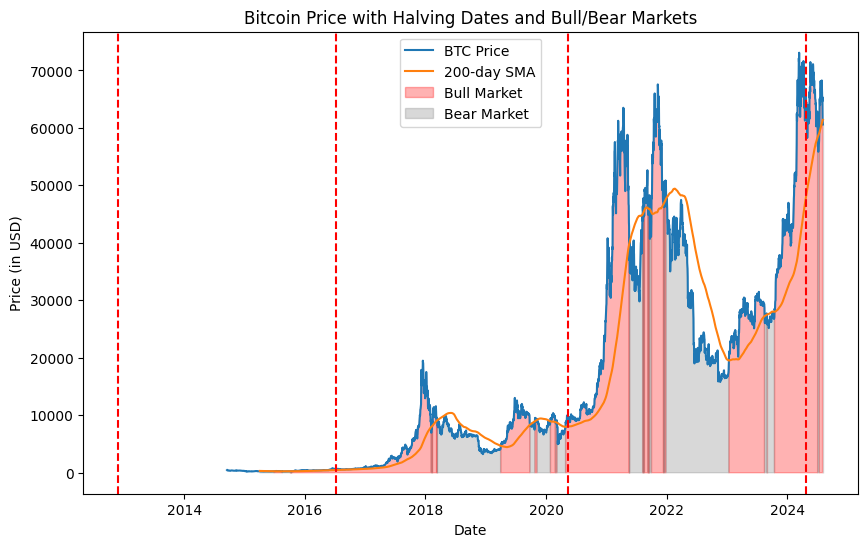

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fetch historical data
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="max")

# Calculate the 200-day Simple Moving Average (SMA)
hist['SMA200'] = hist['Close'].rolling(window=200).mean()

# Bitcoin halving dates
halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11','2024-04-23']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Plot the closing prices
ax.plot(hist['Close'], label='BTC Price')

# Plot the 200-day SMA
ax.plot(hist['SMA200'], label='200-day SMA')

# Add vertical lines for the halving dates
for date in halving_dates:
    ax.axvline(x=pd.Timestamp(date), color='red', linestyle='--')

# Shade bull and bear markets
bull_market = np.where(hist['Close'] >= hist['SMA200'], 1, 0)
bear_market = np.where(hist['Close'] < hist['SMA200'], 1, 0)

ax.fill_between(hist.index, hist['Close'], where=bull_market, color='red', alpha=0.3, label='Bull Market')
ax.fill_between(hist.index, hist['Close'], where=bear_market, color='grey', alpha=0.3, label='Bear Market')

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price (in USD)')
ax.set_title('Bitcoin Price with Halving Dates and Bull/Bear Markets')
ax.legend()

# Display the plot
plt.show()
